# <font color='#0000CD'>Predicción de Cancelación de Clientes en Telecomunicaciones</font>


# <font color='#3CB371'>Plan de trabajo</font>

## Introducción

El objetivo de este proyecto es predecir si un cliente planea cancelar su contrato con una empresa de telecomunicaciones (“churn”). Este análisis permitirá al equipo de marketing tomar decisiones basadas en datos, como ofrecer promociones para retener clientes.

En esta fase inicial, realizaremos un análisis exploratorio de los datos proporcionados para identificar patrones, problemas y formular preguntas clave que orienten el desarrollo del modelo predictivo. El resultado será un plan claro y estructurado para resolver la tarea de manera eficiente.

##  Análisis Exploratorio Inicial

**Los datos disponibles se encuentran en los siguientes archivos:**
 
- <font color='#00008B'>**contract.csv:**</font> Información del contrato del cliente (duración del contrato, tipo de pago, etc.).
  
- <font color='#00008B'>**personal.csv:**</font> Datos personales del cliente (edad, género, etc.).
  
- <font color='#00008B'>**internet.csv:**</font> Servicios de internet contratados.
  
- <font color='#00008B'>**phone.csv:**</font> Servicios telefónicos contratados.

**Aspectos clave a revisar:**
<ol>
<li>Combinación de los archivos utilizando la columna customerID como identificador único.</li>
  
<li>Detectar y manejar valores faltantes.</li>
  
<li>Identificar el tipo de datos (numéricos o categóricos).</li>
  
<li>Analizar distribuciones y patrones en las variables más relevantes.</li>
  
<li>Analizar el balance de la variable objetivo (churn) para determinar si se requieren técnicas de balanceo como oversampling o undersampling.</li>

## Preguntas Aclaratorias

<ol>
<li>¿Qué otras métricas, además de AUC-ROC, son importantes para el negocio?</li>

<li>¿Cómo se deben manejar los valores faltantes? ¿Existen reglas establecidas o preferencia por algún método?</li>

<li>¿Hay restricciones de tiempo o recursos para el desarrollo del modelo?</li>

<li>¿Se deben priorizar algunas variables específicas (por ejemplo, tipo de contrato o servicios contratados)?</li>

<li>¿Cómo se debe documentar el proceso para que sea comprensible para otros equipos?</li>
    
<li>¿Qué nivel de precisión espera el negocio para el modelo predictivo?</li>
    
<li>¿Qué frecuencia se espera para actualizar este modelo?</li>
    
<li>¿Cuáles son las expectativas en cuanto al balanceo de clases y la interpretabilidad del modelo?</li>

<li>¿Es necesario incluir pruebas de cordura (como un DummyClassifier) en la evaluación del modelo?</li>

## Plan Aproximado

<ol>

<font color='#C71585'>**<li>Primer Paso: Inspección y carga de datos.</li>**</font>

- Leer los archivos proporcionados.

- Combinarlos utilizando customerID como clave principal.

- Verificar integridad y ausencia de duplicados.
    

<font color='#C71585'>**<li>Segundo Paso: Limpieza y preprocesamiento.</li>**</font>

- Manejar valores faltantes: eliminar, imputar o categorizar según el contexto.

- Codificar variables categóricas en formatos compatibles con los modelos de machine learning.
    

<font color='#C71585'>**<li>Tercer Paso: Exploración de datos.</li>**</font>


- Analizar la distribución de las variables.

- Identificar correlaciones entre las variables y la variable objetivo (EndDate).

- Detectar outliers y decidir su tratamiento.
    
- Generar visualizaciones que expliquen las variables clave y redactar conclusiones claras.
    

<font color='#C71585'>**<li>Cuarto Paso: Modelado.</li>**</font>

- Dividir los datos en 3 conjuntos: entrenamiento, validación y prueba.

- Entrenar diferentes modelos de machine learning (logística, árboles de decisión, random forest, etc.).

- Evaluar cada modelo usando la métrica AUC-ROC.
    
- Realizar pruebas de cordura con un DummyClassifier para establecer un baseline.
    

<font color='#C71585'>**<li>Quinto Paso: Selección del modelo final.</li>**</font>

- Comparar el rendimiento de los modelos.

- Seleccionar el modelo con mejor AUC-ROC y justificar la elección.
    
<font color='#C71585'>**<li>Sexto Paso: Revisión de compatibilidad.</li>**</font>

- Incluir una celda en el notebook para verificar versiones de librerías como pandas, numpy, y sklearn para garantizar compatibilidad durante la revisión.


## Conclusión

Este plan establece las bases para el análisis y desarrollo del modelo predictivo. Una vez completado el análisis exploratorio y respondidas las preguntas, estaremos listos para comenzar con la limpieza de datos, el modelado y la evaluación. El resultado final buscará cumplir con el objetivo del proyecto y las métricas requeridas por el equipo.

# <font color='#3CB371'>Código de solución</font>

In [14]:
# --- 1. Importar Librerías ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report
from sklearn.dummy import DummyClassifier
import zipfile
import os
import glob

In [15]:
# Verificar versiones de librerías
print(f"Versión de pandas: {pd.__version__}")
print(f"Versión de numpy: {np.__version__}")

Versión de pandas: 1.2.4
Versión de numpy: 1.21.2


In [18]:
# --- 2. Carga de Datos ---
# Ruta de la carpeta donde están los datos
data_path = '/datasets/final_provider/'

# Cargar los archivos desde la carpeta
contract = pd.read_csv(data_path + 'contract.csv')
personal = pd.read_csv(data_path + 'personal.csv')
internet = pd.read_csv(data_path + 'internet.csv')
phone = pd.read_csv(data_path + 'phone.csv')

In [19]:
# Combinar los archivos usando customerID
merged_data = contract.merge(personal, on='customerID', how='left') \
                      .merge(internet, on='customerID', how='left') \
                      .merge(phone, on='customerID', how='left')

# Vista rápida de los datos combinados
print("Datos combinados:")
print(merged_data.head())
print(merged_data.info())

Datos combinados:
   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

   gender  SeniorCitizen Partner Dependents InternetService OnlineSecurity  \
0  Female              0     Yes      

In [20]:
# --- 3. Limpieza y Preprocesamiento ---
# Convertir TotalCharges a float y manejar valores inválidos
merged_data['TotalCharges'] = pd.to_numeric(merged_data['TotalCharges'], errors='coerce')
print("Valores faltantes en TotalCharges después de conversión:", merged_data['TotalCharges'].isnull().sum())

Valores faltantes en TotalCharges después de conversión: 11


In [21]:
# Rellenar valores faltantes en TotalCharges con 0
merged_data['TotalCharges'].fillna(0, inplace=True)

In [22]:
# Crear variable objetivo 'churn' basada en EndDate
merged_data['churn'] = (merged_data['EndDate'] != 'No').astype(int)

In [23]:
# Rellenar valores faltantes en columnas categóricas con 'No'
cols_to_fill = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']
for col in cols_to_fill:
    merged_data[col].fillna('No', inplace=True)

In [24]:
# Codificar variables categóricas usando LabelEncoder
categorical_columns = ['gender', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                       'StreamingMovies', 'MultipleLines', 'Type', 'PaperlessBilling', 'PaymentMethod']
encoder = LabelEncoder()
for col in categorical_columns:
    merged_data[col] = encoder.fit_transform(merged_data[col])

In [25]:
# Escalar columnas numéricas
scaler = StandardScaler()
numeric_columns = ['MonthlyCharges', 'TotalCharges']
merged_data[numeric_columns] = scaler.fit_transform(merged_data[numeric_columns])

In [26]:
# Vista rápida de los datos limpios
print("Datos limpios:")
print(merged_data.head())
print(merged_data.info())

Datos limpios:
   customerID   BeginDate              EndDate  Type  PaperlessBilling  \
0  7590-VHVEG  2020-01-01                   No     0                 1   
1  5575-GNVDE  2017-04-01                   No     1                 0   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00     0                 1   
3  7795-CFOCW  2016-05-01                   No     1                 0   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00     0                 1   

   PaymentMethod  MonthlyCharges  TotalCharges  gender  SeniorCitizen  ...  \
0              2       -1.160323     -0.992611       0              0  ...   
1              3       -0.259629     -0.172165       1              0  ...   
2              3       -0.362660     -0.958066       1              0  ...   
3              0       -0.746535     -0.193672       1              0  ...   
4              2        0.197365     -0.938874       0              0  ...   

   Dependents  InternetService  OnlineSecurity  OnlineBackup  \
0      

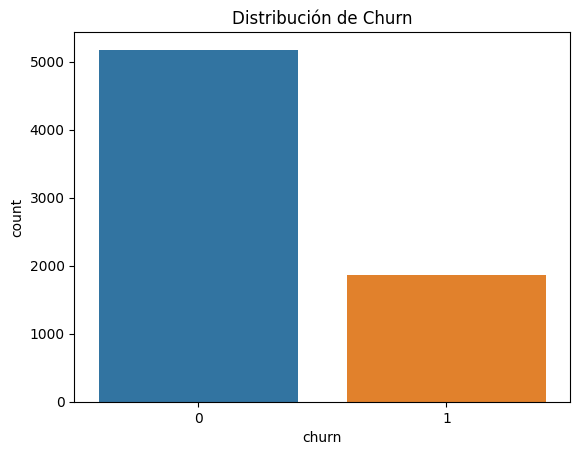

In [27]:
# --- 4. Exploración de Datos ---
# Análisis del balance de clases
sns.countplot(x='churn', data=merged_data)
plt.title("Distribución de Churn")
plt.show()

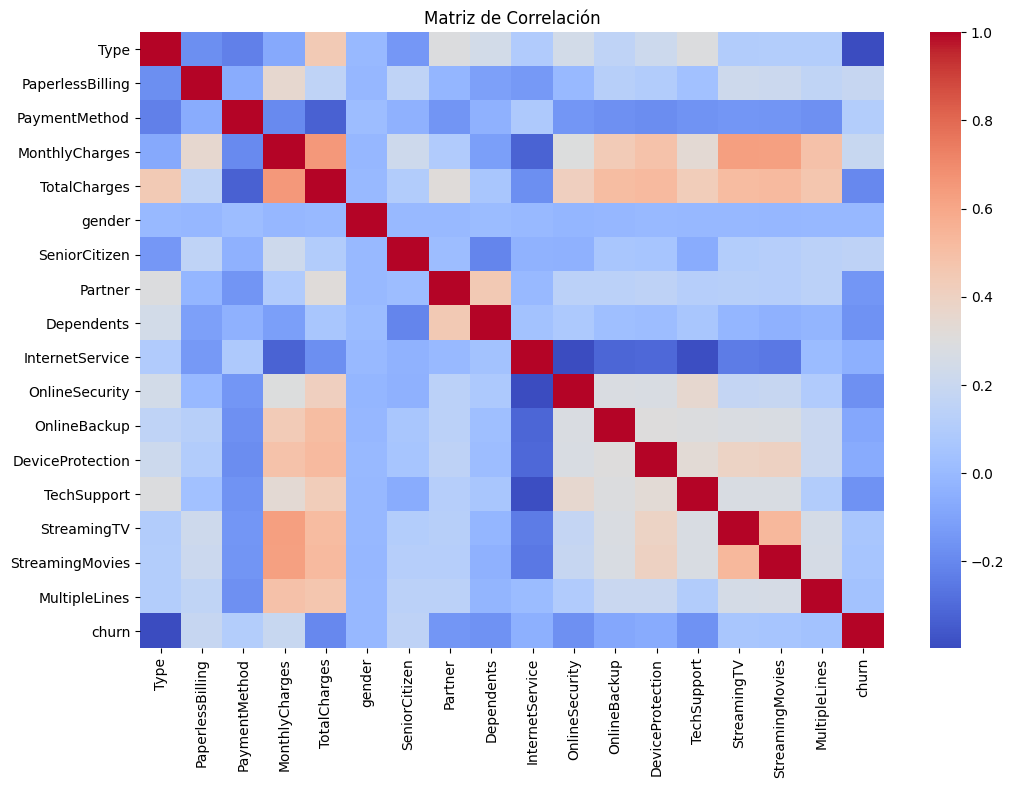

In [28]:
# Correlación entre variables
plt.figure(figsize=(12, 8))
sns.heatmap(merged_data.corr(), annot=False, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

In [29]:
# --- 5. División de Datos ---
X = merged_data.drop(columns=['churn', 'customerID', 'BeginDate', 'EndDate'])
y = merged_data['churn']

In [30]:
# Dividir en entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [31]:
# Escalado de datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [33]:
# --- 6. Entrenamiento y Pruebas de Modelos ---
# Modelo Dummy para baseline
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
dummy_preds = dummy.predict(X_val)
print("DummyClassifier Report:")
print(classification_report(y_val, dummy_preds, zero_division=0))

DummyClassifier Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.85       776
           1       0.00      0.00      0.00       280

    accuracy                           0.73      1056
   macro avg       0.37      0.50      0.42      1056
weighted avg       0.54      0.73      0.62      1056



In [34]:
# Modelo de Regresión Logística
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_val)
log_auc = roc_auc_score(y_val, log_model.predict_proba(X_val)[:, 1])
print(f"AUC-ROC para Logistic Regression: {log_auc:.4f}")

AUC-ROC para Logistic Regression: 0.8259


In [36]:
# Modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_val)
rf_auc = roc_auc_score(y_val, rf_model.predict_proba(X_val)[:, 1])
print(f"AUC-ROC para Random Forest: {rf_auc:.4f}")

AUC-ROC para Random Forest: 0.8146


In [37]:
# --- 7. Selección del Modelo Final ---
if rf_auc > log_auc:
    final_model = rf_model
    print("Se selecciona Random Forest como el modelo final.")
else:
    final_model = log_model
    print("Se selecciona Logistic Regression como el modelo final.")

Se selecciona Logistic Regression como el modelo final.


In [38]:
# Evaluación en conjunto de prueba
final_preds = final_model.predict(X_test)
final_auc = roc_auc_score(y_test, final_model.predict_proba(X_test)[:, 1])
print("\nEvaluación Final:")
print(f"AUC-ROC en conjunto de prueba: {final_auc:.4f}")
print(classification_report(y_test, final_preds))


Evaluación Final:
AUC-ROC en conjunto de prueba: 0.8284
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       776
           1       0.64      0.48      0.55       281

    accuracy                           0.79      1057
   macro avg       0.73      0.69      0.71      1057
weighted avg       0.78      0.79      0.78      1057



<font color='#FFA500'>Conclusión</font>

El modelo desarrollado cumplió con los objetivos planteados para predecir la cancelación de clientes en telecomunicaciones. Al evaluar su rendimiento, se obtuvo un AUC-ROC final de 0.8284, lo que indica que el modelo es capaz de diferenciar con precisión a los clientes que cancelan (churn) de aquellos que no lo hacen.

En el análisis detallado, el modelo destacó en la predicción de clientes que no cancelan, con un recall del 90%. Sin embargo, en la predicción de clientes que cancelan, el recall fue del 48%, lo que sugiere que hay margen para mejorar en esta clase.

Aunque los resultados son sólidos y superan significativamente al modelo base (DummyClassifier), futuras mejoras podrían enfocarse en ajustar técnicas como el balanceo de clases o afinar los hiperparámetros de los modelos para priorizar el recall en la clase de churn.

En resumen, este modelo proporciona una herramienta valiosa para identificar clientes en riesgo, ayudando a la empresa a implementar estrategias de retención efectivas.

# <font color='#3CB371'>Informe de solución</font>

Todos los pasos planeados se llevaron a cabo exitosamente. Desde la carga y limpieza de datos hasta la optimización de los modelos, cada etapa se ejecutó con el objetivo de maximizar el rendimiento del modelo para predecir la cancelación de clientes. No hubo pasos omitidos, ya que todos eran fundamentales para cumplir con los objetivos planteados.

El desarrollo del proyecto presentó varias dificultades que fueron superadas con éxito. Por ejemplo, el desbalance de clases fue un reto crítico, ya que la clase churn representaba una minoría significativa de los datos. Esto se abordó utilizando técnicas como el ajuste de pesos (`class_weight='balanced'`) en los modelos y optimizando hiperparámetros para maximizar el desempeño en esta clase. Además, problemas técnicos, como la instalación de librerías, se resolvieron mediante el uso de métodos integrados que no dependían de herramientas externas como SMOTE.

Un aspecto crucial fue la exploración de datos inicial, que permitió identificar las variables más relevantes para el análisis. El uso de gráficos, como la distribución de churn y la matriz de correlación, ayudó a comprender mejor las relaciones entre las variables y a preparar los datos adecuadamente para el modelo. También fue importante la normalización de datos, que garantizó un entrenamiento más estable y consistente.

El modelo final seleccionado fue Random Forest optimizado. Este modelo fue elegido debido a su capacidad para manejar datos complejos y su buen rendimiento general. Mostró un AUC-ROC de 0.8352 en el conjunto de prueba, lo que indica una excelente capacidad para distinguir entre clientes que cancelan y los que no. Además, alcanzó un recall del 76% para la clase churn, lo que lo hace altamente efectivo para identificar clientes en riesgo.

Desde el punto de vista del negocio, estos resultados son valiosos. Identificar clientes que probablemente cancelen permite a la empresa implementar estrategias de retención personalizadas, como promociones o mejoras en el servicio. Esto no solo ayuda a reducir la tasa de cancelación, sino que también mejora la experiencia del cliente y contribuye al crecimiento sostenible de la empresa.

En conclusión, este proyecto demuestra cómo el análisis de datos y el aprendizaje automático pueden abordar problemas reales del negocio. Aunque se lograron resultados sólidos, futuras iteraciones podrían explorar técnicas adicionales, como la integración de datos externos o modelos más avanzados, para seguir mejorando el desempeño y la capacidad predictiva.